In [3]:
from IPython.display import display, Math

In [4]:
# As seguintes librarias serão necessárias para resolver os exercícios
import numpy as np # O numpy permite efetuar cálculos de forma eficiente
                   # sobre vários números (arrays)
import matplotlib.pyplot as plt # O matplotlib e o seu módulo pyplot oferecem
                                # uma interface simples para gerar gráficos

# Exercício 1

Um corpo de massa 1 kg move-se num oscilador harmónico forçado. Se a posição de equilíbrio for a origem do eixo $x_\text{eq} = 0 \; \text{m}$, o oscilador harmónico tem a energia potencial $E_p = \frac{1}{2} k x^2$ e exerce no corpo a força

$$
F_x = -k x
$$

O oscilador é amortecido pela força $-b v_x$ e sujeito à força externa $F_0 \cos \left( \omega_f t \right)$.

Considere $k = 1 \; \text{N/m}$, $b = 0.05 \; \text{kg/s}$, $F_0 = 7.5 \; \text{N}$ e $\omega_f = 1.0 \; \text{rad/s}$.

In [14]:
# Dados
k = 1
m = 1
b = 0.05
F_0 = 7.5
omega_f = 1.0

## Alínea A

Calcule numericamente a lei do movimento, no caso em que a velocidade inicial é nula e a posição inicial 4m. Tem confiança no seu resultado?

Utilizamos o método de Euler-Cromer para calcular numericamente a lei do movimento através da fórmula da força que nos é dada.

Como ao longo do exercício vai ser necessário fazer várias vezes este cálculo mas com valores iniciais diferentes, vamos mover o código do método de Euler-Cromer para uma função `movimento`. 

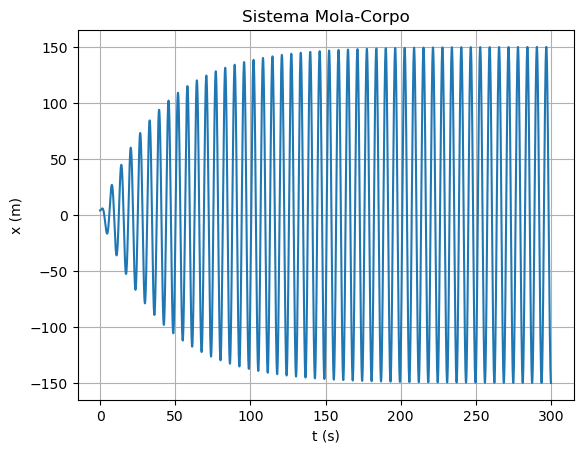

In [87]:
def movimento(*, dt, x0 = 4, v0 = 0, tf=300):
    t0 = 0

    # Número de passos/iterações
    #
    # + 0.1 para garantir que não há arrendodamentos
    # para baixo
    n = int((tf-t0) / dt + 0.1)

    t = np.zeros(n + 1) # Tempo
    x = np.zeros(n + 1) # Posição
    v = np.zeros(n + 1) # Velocidade
    a = np.zeros(n + 1) # Aceleração

    # Valores inicias
    v[0] = v0
    t[0] = t0
    x[0] = x0

    for i in range(n):
      a[i] = -k/m*x[i] - (b/m)*v[i] + (F_0/m)*np.cos(omega_f * t[i])
      v[i + 1] = v[i] + a[i] * dt
      x[i + 1] = x[i] + v[i + 1] * dt 
      t[i + 1] = t[i] + dt
    
    return t, x, v

dt = 0.001
t, x, _ = movimento(dt=dt)

plt.plot(t, x)
plt.ylabel("x (m)")
plt.xlabel("t (s)")
plt.title("Sistema Mola-Corpo")
plt.grid()
plt.show()

Para termos confiança no resultado, voltamos a fazer o cálculo numérico mas com um passo temporal diferente, se os dois resultados convergirem podemos ter confiança no resultado.

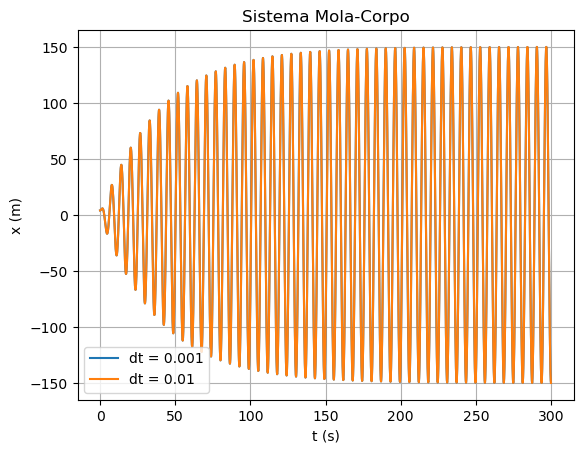

In [75]:
plt.plot(t, x, label="dt = 0.001")
t_01, x_01, _ = movimento(dt=0.01)
plt.plot(t_01, x_01, label="dt = 0.01")
plt.ylabel("x (m)")
plt.xlabel("t (s)")
plt.title("Sistema Mola-Corpo")
plt.legend()
plt.grid()
plt.show()

## Alínea B

Calcule a amplitude do movimento e o seu período no regime estacionário, usando os resultados numéricos.

Começamos por identificar a região do gráfico onde o oscilador se encontra em regime estacionário. Fazemos isto olhando para o gráfico e encontrando a região onde o período e a amplitude da oscilação se tornam constantes.

No caso deste gráfico isto acontece mais ou menos após o instante $t = 200 \; \text{s}$ mas para termos a certeza vamos utilizar a região após $t = 250 \; \text{s}$.

De seguida utilizamos a interpolação para calcular extremos para obter a amplitude e o período.

In [90]:
def interpolate_extremum(x0, y0, x1, y1, x2, y2):
    """Calculates a maximum or minimum (extremum) using Lagrange's polynomial
    
    Parameters
    ----------
    x0, y0 : float
        Coordinates of the first point to sample from
    x1, y1 : float
        Coordinates of the second point to sample from
    x2, y2 : float
        Coordinates of the third point to sample from
    
    Returns
    ----------
    xm: float
        The coordinate of the extremum
    ym: float
        The extremum
    """
    xab = x0-x1
    xac = x0-x2
    xbc = x1-x2
    
    a = y0/(xab*xac)
    b = -y1/(xab*xbc)
    c = y2/(xac*xbc)
    
    xmla = (b+c)*x0+(a+c)*x1+(a+b)*x2
    xm = xmla/(2*(a+b+c))
    
    xta = xm-x0
    xtb = xm-x1
    xtc = xm-x2
    
    ymax = a*xtb*xtc+b*xta*xtc+c*xta*xtb
    return xm, ymax

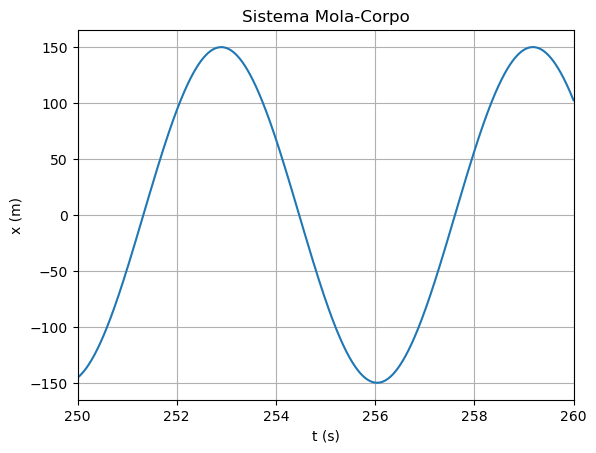

In [98]:
plt.plot(t, x)
plt.ylabel("x (m)")
plt.xlabel("t (s)")
plt.title("Sistema Mola-Corpo")
plt.xlim([250, 260])
plt.grid()
plt.show()

In [99]:
def get_value(t, x):
    targetIdx = int(np.ceil(t / dt))
    return x[targetIdx]
    
t_max, x_max = interpolate_extremum(
    252, get_value(252, x),
    253, get_value(253, x),
    254, get_value(254, x),
)
t_min, x_min = interpolate_extremum(
    255, get_value(255, x),
    256, get_value(256, x),
    257, get_value(257, x),
)

A = (x_max - x_min)/2

In [100]:
display(Math(r'A = {:.3f} \; \text{{m}}'.format(A)))

<IPython.core.display.Math object>

In [101]:
t_max2, x_max2 = interpolate_extremum(
    258, get_value(258, x),
    259, get_value(259, x),
    260, get_value(260, x),
)

T = t_max2 - t_max

In [102]:
display(Math(r'T = {:.3f} \; \text{{s}}'.format(T)))

<IPython.core.display.Math object>

## Alínea C

Calcule numericamente a lei do movimento, no caso em que a velocidade inicial é -4 m/s e a posição inicial -2 m.

Fazemos o mesmo que na alínea a) mudando apenas os valores iniciais da função `movimento`. 

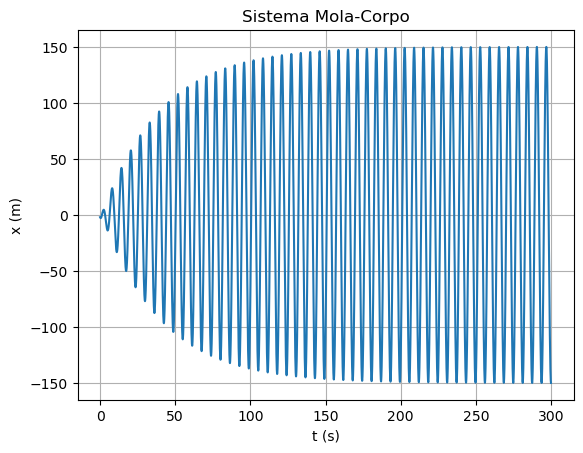

In [106]:
dt = 0.001
t, x, v = movimento(dt=dt, x0=-2, v0=-4)

plt.plot(t, x)
plt.ylabel("x (m)")
plt.xlabel("t (s)")
plt.title("Sistema Mola-Corpo")
plt.grid()
plt.show()

## Alínea D

Calcule a amplitude do movimento e o seu período no regime estacionário, usando os resultados numéricos.

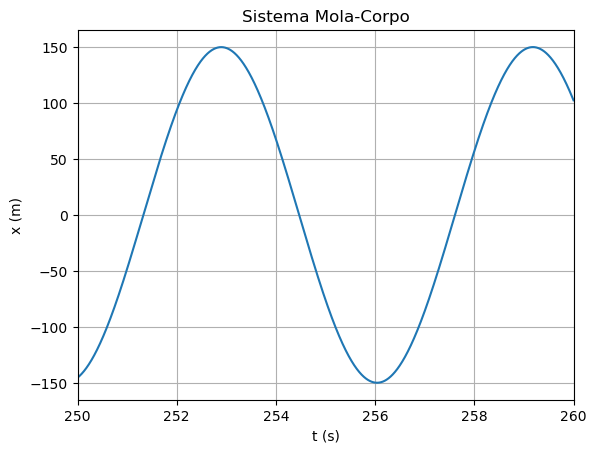

In [107]:
plt.plot(t, x)
plt.ylabel("x (m)")
plt.xlabel("t (s)")
plt.title("Sistema Mola-Corpo")
plt.xlim([250, 260])
plt.grid()
plt.show()

In [108]:
def get_value(t, x):
    targetIdx = int(np.ceil(t / dt))
    return x[targetIdx]
    
t_max, x_max = interpolate_extremum(
    252, get_value(252, x),
    253, get_value(253, x),
    254, get_value(254, x),
)
t_min, x_min = interpolate_extremum(
    255, get_value(255, x),
    256, get_value(256, x),
    257, get_value(257, x),
)

A = (x_max - x_min)/2

In [109]:
display(Math(r'A = {:.3f} \; \text{{m}}'.format(A)))

<IPython.core.display.Math object>

In [110]:
t_max2, x_max2 = interpolate_extremum(
    258, get_value(258, x),
    259, get_value(259, x),
    260, get_value(260, x),
)

T = t_max2 - t_max

In [111]:
display(Math(r'T = {:.3f} \; \text{{s}}'.format(T)))

<IPython.core.display.Math object>

## Alínea E

Calcule a energia mecânica. É constante ao longo do tempo?

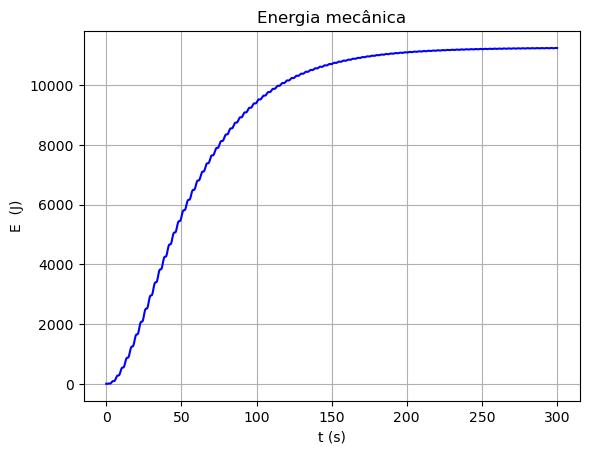

In [112]:
Ep = 1/2*k*x**2

plt.plot(t, Ep + 1/2*m*v**2, color="blue")
plt.ylabel("E  (J)")
plt.xlabel("t (s)")
plt.title("Energia mecânica")
plt.grid()
plt.show()

A energia mecânica não é constante ao longo do tempo, não há conservação da energia mecânica.

# Exercício 2

Implemente o método de Runge-Kutta de 4ᵃ ordem para calcular a velocidade com que um volante de badmington atinge 2 s depois de ser largado. A velocidade terminal do volante é de 6.80 m/s, e a aceleração é

$$
a_y (t) = g - \frac{g}{v_T^2} \left\lvert v_y \right\rvert v_y
$$

Compare o valor obtido com o valor exato, de acordo com a lei $v_y (t) = v_T \tanh \left( \frac{gt}{v_T} \right)$

O método de runge kutta de 4ᵃ ordem é implementado pela seguinte função, esta leva, um instante, posição e velocidade atuais, uma função que deve calcular a aceleração com base nesses três valores e o passo temporal.

In [114]:
def runge_kutta_4(t, x, vx, acelera, dt):
    """Numerical integration for a second order derivative in respect
    to the motion.
    
    Parameters
    ----------
    t : float
        Current time instant
    x : float
        Current position of the body
    vx : float
        Current velocity of the body
    acceleration : Callable[[float, float, float], float]
        The acceleration in function of the time, position and velocity (in that order)
    dt : float
        The time step to use in the integration
    
    Returns
    ----------
    xp : float
        The next position
    vxp : float
        The next velocity
    """
    ax1=acelera(t,x,vx)
    c1v=ax1*dt
    c1x=vx*dt
    
    ax2=acelera(t+dt/2.,x+c1x/2.,vx+c1v/2.)
    c2v=ax2*dt
    c2x=(vx+c1v/2.)*dt # predicto: vx(t+dt) * dt
    
    ax3=acelera(t+dt/2.,x+c2x/2.,vx+c2v/2.)
    c3v=ax3*dt
    c3x=(vx+c2v/2.)*dt
    
    ax4=acelera(t+dt,x+c3x,vx+c3v)
    c4v=ax4*dt
    c4x=(vx+c3v)*dt
    
    xp=x+(c1x+2.*c2x+2.*c3x+c4x)/6.
    vxp=vx+(c1v+2.*c2v+2.*c3v+c4v)/6.
    
    return xp, vxp

Para calcular o valor da velocidade no instante 2s utilizamos a mesma estrutura do método de Euler-Cromer com o loop para cada aproximação, mas substituimos a integração de Euler pelo método de Runge-Kutta no interior do loop.

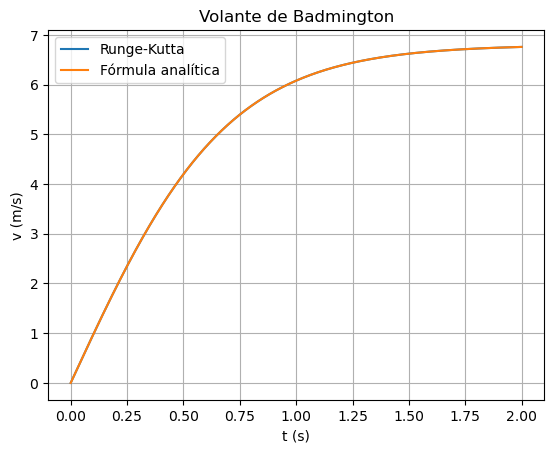

In [129]:
# Dados
g = 9.8
v_T = 6.8
# Initial conditions
y0 = 0
v0 = 0
# Parameters
dt = 0.001
t0 = 0
tf = 2

accel = lambda t, y, v: g - (g/v_T**2) * np.abs(v) * v

# Número de passos/iterações
#
# + 0.1 para garantir que não há arrendodamentos
# para baixo
n = int((tf-t0) / dt + 0.1)

t = np.zeros(n + 1) # Tempo
y = np.zeros(n + 1) # Posição
v = np.zeros(n + 1) # Velocidade

# Valores inicias
v[0] = v0
t[0] = t0
y[0] = y0

for i in range(n):
  my, vy = runge_kutta_4(t[i], y[i], v[i], accel, dt)
  v[i + 1] = vy
  y[i + 1] = my
  t[i + 1] = t[i] + dt

plt.plot(t, v, label="Runge-Kutta")
plt.plot(t, v_T * np.tanh(g*t/v_T), label="Fórmula analítica")
plt.ylabel("v (m/s)")
plt.xlabel("t (s)")
plt.title("Volante de Badmington")
plt.legend()
plt.grid()
plt.show()

In [130]:
v_runge_kutta = v[-1]
v_exata = v_T * np.tanh(g*2/v_T)

In [131]:
display(Math(r'v_\text{{Runge-Kutta}} = {:.3f} \; \text{{m/s}}'.format(v_runge_kutta)))
display(Math(r'v_\text{{exata}} = {:.3f} \; \text{{m/s}}'.format(v_exata)))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

O valor exato e o valor determinado pelo método de Runge-Kutta são iguais.